### Importamos las librerias

In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 10)
sns.set(style="whitegrid")
pd.options.display.float_format = '{:20,.2f}'.format
warnings.filterwarnings('ignore')

### Importamos los datasets

In [2]:
df_train_values = pd.read_csv('../../datasets/train_values.csv')
df_train_labels = pd.read_csv('../../datasets/train_labels.csv')

df_train_values=df_train_values.astype({
    'land_surface_condition':'category',
    'foundation_type':'category',
    'roof_type':'category',
    'ground_floor_type':'category',
    'other_floor_type':'category',
    'position':'category',
    'plan_configuration':'category',

    'legal_ownership_status':'category',

    'has_secondary_use':'bool',
    'has_secondary_use_agriculture':'bool', 
    'has_secondary_use_hotel':'bool', 
    'has_secondary_use_rental':'bool', 
    'has_secondary_use_institution':'bool', 
    'has_secondary_use_school':'bool',
    'has_secondary_use_industry':'bool',
    'has_secondary_use_health_post':'bool',
    'has_secondary_use_gov_office':'bool',
    'has_secondary_use_use_police':'bool',
    'has_secondary_use_other':'bool'
})
df_train_labels = df_train_labels.astype({'damage_grade':'category'})

### Hacemos el análisis

In [3]:
superstructures = [
    'has_superstructure_adobe_mud',
    'has_superstructure_mud_mortar_stone',
    'has_superstructure_stone_flag',
    'has_superstructure_cement_mortar_stone',
    'has_superstructure_mud_mortar_brick',
    'has_superstructure_cement_mortar_brick',
    'has_superstructure_timber',
    'has_superstructure_bamboo',
    'has_superstructure_rc_non_engineered',
    'has_superstructure_rc_engineered',
    'has_superstructure_other'
]
df_has_superstructure = df_train_values[superstructures]

In [4]:
df_has_superstructure.head()

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
0,1,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0


In [5]:
df_has_superstructure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 11 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   has_superstructure_adobe_mud            260601 non-null  int64
 1   has_superstructure_mud_mortar_stone     260601 non-null  int64
 2   has_superstructure_stone_flag           260601 non-null  int64
 3   has_superstructure_cement_mortar_stone  260601 non-null  int64
 4   has_superstructure_mud_mortar_brick     260601 non-null  int64
 5   has_superstructure_cement_mortar_brick  260601 non-null  int64
 6   has_superstructure_timber               260601 non-null  int64
 7   has_superstructure_bamboo               260601 non-null  int64
 8   has_superstructure_rc_non_engineered    260601 non-null  int64
 9   has_superstructure_rc_engineered        260601 non-null  int64
 10  has_superstructure_other                260601 non-null  int64
dtype

In [6]:
df_has_superstructure['suma_structure'] = df_has_superstructure.sum(axis=1)

In [7]:
df_has_superstructure['suma_structure'].value_counts()

1    176016
2     57838
3     20210
4      4925
5      1259
6       314
7        35
8         4
Name: suma_structure, dtype: int64

In [8]:
df_train_values[(df_has_superstructure['suma_structure'] == 8)]

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
5577,747820,11,131,8614,2,0,11,7,t,r,...,False,False,False,False,False,False,False,False,False,False
53043,841313,23,774,9172,2,45,6,5,t,u,...,False,False,False,False,False,False,False,False,False,False
54684,166615,27,181,7810,5,70,20,10,t,r,...,False,True,False,False,False,False,False,False,False,False
251212,383507,7,901,11244,2,0,3,9,o,i,...,False,False,False,False,False,False,False,False,False,False


84585 edificios tiene más de un tipo de superstructure

### __Hacemos un análisis de los materiales utilizados__

__Filtro el segmento de datos que me interesa__

Queremos saber cuál fue el material mas resistente y el material mas golpeado. 
Qué relación tiene esto, con por ejemplo la antiguedad de un edificio, el diseño antisísmico o la combinación de superstructures?

In [9]:
def calculatePercentage(field, name_total):
    loc_filter = (df_train_values[field] == 1)
    df_train_values_filtered = df_train_values.loc[loc_filter, :]
    total_buildings_by_superstructure = df_train_values_filtered.count().building_id
    df_has_superstructure_with_damage = df_train_values_filtered.merge(df_train_labels)
    df_total_superstructure_by_damage = df_has_superstructure_with_damage\
        .groupby('damage_grade')\
        .count()\
        .reset_index()\
        .rename(columns={ 'building_id': name_total })
    df_total_superstructure_by_damage['percentage'] = df_total_superstructure_by_damage[name_total] * 100 / total_buildings_by_superstructure
    return [df_has_superstructure_with_damage, df_total_superstructure_by_damage]

### __Variable: has_superstructure_adobe_mud__

In [10]:
df_adobe_with_damage, df_adobe_with_percentage = calculatePercentage('has_superstructure_adobe_mud', 'total_superstructure_adobe_mud')
df_adobe_with_damage

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,False,False,False,False,False,False,False,False,False,3
1,201944,11,131,1488,3,30,8,9,t,r,...,False,False,False,False,False,False,False,False,False,3
2,980230,27,216,12323,3,10,7,7,t,r,...,False,False,False,False,False,False,False,False,False,3
3,793397,27,216,12323,3,40,7,5,t,r,...,False,False,False,False,False,False,False,False,False,2
4,529366,27,548,1119,3,60,27,10,t,r,...,False,False,False,False,False,False,False,False,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23096,325362,11,765,8332,2,60,9,7,t,r,...,False,False,False,False,False,False,False,False,False,2
23097,934140,11,765,8332,2,10,16,7,t,r,...,False,False,False,False,False,False,False,False,False,2
23098,88833,3,720,9139,3,15,10,7,t,r,...,False,False,False,False,False,False,False,False,False,3
23099,278052,27,269,328,2,20,8,5,t,r,...,False,False,False,False,False,False,False,False,False,3


Es claro ver como el adobe fue de los materiales mas golpeados por el daño 3, aunque no es la mayor parte del daño, son de los mas golpeados. 

Veamos que pasa con la antiguedad.

Text(0, 0.5, 'Porcentaje')

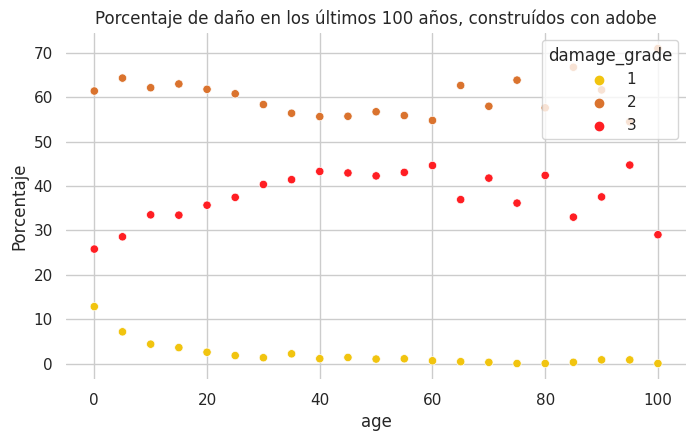

In [11]:
df_adobe_with_damage_by_age = df_adobe_with_damage\
    .merge(df_train_values)[['damage_grade', 'building_id', 'age']]\
    .groupby(['age', 'damage_grade'])\
    .count()\
    .reset_index()\
    .rename(columns={ 'building_id': 'total_buildings_by_age_and_adobe' })
df_adobe_with_damage_by_age = df_adobe_with_damage_by_age.loc[df_adobe_with_damage_by_age['age'] <= 100, :]

dt_total_by_age = df_adobe_with_damage\
    .groupby(['age'])\
    .agg({ 'building_id': 'count' })\
    .reset_index()\
    .rename(columns={ 'building_id': 'total_by_age' })

df_total_by_age_percentage_damage = dt_total_by_age\
    .merge(df_adobe_with_damage_by_age)

df_total_by_age_percentage_damage['percentage'] = (df_total_by_age_percentage_damage['total_buildings_by_age_and_adobe'] * 100) / df_total_by_age_percentage_damage['total_by_age']
df = df_total_by_age_percentage_damage.loc[df_total_by_age_percentage_damage['age'] <= 100, :]
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(8, 4.5))
sns.despine(f, left=True, bottom=True)
damage = [1, 2, 3]
plot = sns.scatterplot(
    x="age",
    y="percentage",
    hue="damage_grade",
    palette={ 1: '#f1c40f', 2: '#da732e', 3: '#ff1e23' },
    data=df,
    ax=ax
)
plt.title('Porcentaje de daño en los últimos 100 años, construídos con adobe')
plt.xlabel('age')
plt.ylabel('Porcentaje')

Text(0, 0.5, 'Cantidad de edificios')

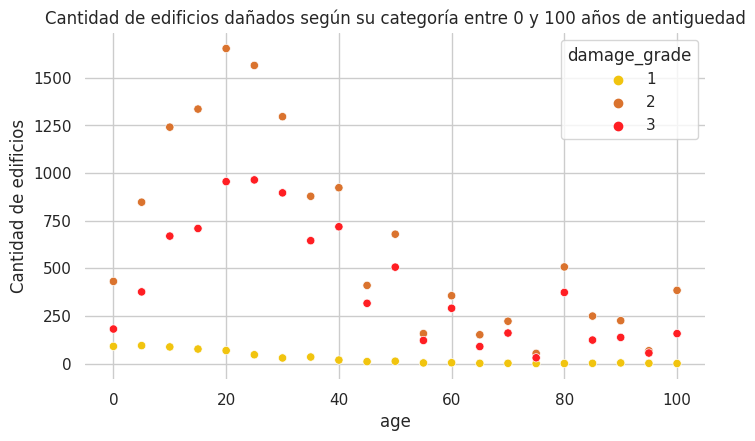

In [63]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(8, 4.5))
sns.despine(f, left=True, bottom=True)
damage = [1, 2, 3]
plot2 = sns.scatterplot(
    x="age",
    y="total_buildings_by_age_and_adobe",
    hue="damage_grade",
    palette={ 1: '#f1c40f', 2: '#da732e', 3: '#ff1e23' },
    data=df,
    ax=ax
)
plt.title('Cantidad de edificios dañados según su categoría entre 0 y 100 años de antiguedad')
# Set x-axis label
plt.xlabel('age')
# Set y-axis label
plt.ylabel('Cantidad de edificios')

En base a agrupar por años y por daño, es interesante ver como se va reduciendo la cantidad de construcciones hechas en adobe acercándose a la actualidad. 

Pero quizá el dato mas interesante, aunque también un tanto obvio, es el desgaste que sufre el adobe con el paso del tiempo. La proporción entre un determinado segmento de antiguedad y sus daños, va inclinándose cada vez mas hacia el daño 3. Muy probablemente un edificio de adobe de varios años de antiguedad sufra mucho mayor daño que uno nuevo. 

Según material en blogs sobre construcción, el adobe tiene una duración promedio de 200 años. Pero es claro que este número no importa y sufre desgaste de manera constante.

In [40]:
df_adobe_with_damage_by_plan = df_adobe_with_damage\
    .merge(df_train_values)[['damage_grade', 'building_id', 'plan_configuration']]\
    .groupby(['plan_configuration', 'damage_grade'])\
    .count()\
    .reset_index()\
    .rename(columns={ 'building_id': 'total_buildings_by_plan_andrc_engineered' })

Por último este grafo tiener cierta coherencia con los datos evaluados a la hora de hacer el análisis entre el diseño antisísmico y el nivel de daño. 
En general todas los diseños antisísmicos fueron poco efectivos, inclusive los que antes resultaron resistentes, aquí fueron todos dañados en proporciones iguales.
En particular la categoría D, que es la mas utilizada en este tipo de construcción, tiene un gran porcentaje de daño nivel 3 en relación al daño nivel 1. 

Podemos concluir que el diseño antisísmico por algún motivo, no es efectivo en las casas de adobe y no influye en la probabilidad de disminuir el daño realizado


### __Variable: has_superstructure_mud_mortar_stone__

In [14]:
df_mud_mortar_stone_with_damage, df_mud_mortar_stone_with_percentage = calculatePercentage('has_superstructure_mud_mortar_stone', 'total_superstructure_mud_mortar_stone')
df_mud_mortar_stone_with_percentage

,damage_grade,total_superstructure_mud_mortar_stone,percentage
0,1,8760,4.41
1,2,113947,57.39
2,3,75854,38.20


### __Variable: has_superstructure_stone_flag__

In [15]:
df_stone_flag_with_damage, df_stone_flag_with_percentage = calculatePercentage('has_superstructure_cement_mortar_stone', 'total_superstructure_cement_mortar_stone')
df_stone_flag_with_percentage

,damage_grade,total_superstructure_cement_mortar_stone,percentage
0,1,829,17.45
1,2,3248,68.35
2,3,675,14.20


### __Variable: has_superstructure_mud_mortar_brick__

In [16]:
df_mud_mortar_brick_with_damage, df_mud_mortar_brick_with_percentage = calculatePercentage('has_superstructure_mud_mortar_brick', 'total_superstructure_mud_mortar_brick')
df_mud_mortar_brick_with_percentage

,damage_grade,total_superstructure_mud_mortar_brick,percentage
0,1,623,3.51
1,2,11698,65.86
2,3,5440,30.63


### __Variable: has_superstructure_cement_mortar_brick__

In [17]:
df_cement_mortar_brick_with_damage, df_cement_mortar_brick_with_percentage = calculatePercentage('has_superstructure_cement_mortar_brick', 'total_superstructure_cement_mortar_brick')
df_cement_mortar_brick_with_percentage

,damage_grade,total_superstructure_cement_mortar_brick,percentage
0,1,7105,36.22
1,2,11421,58.23
2,3,1089,5.55


### __Variable: has_superstructure_timber__

In [18]:
df_timber_with_damage, df_timber_with_percentage = calculatePercentage('has_superstructure_timber', 'total_superstructure_timber')
df_timber_with_percentage

,damage_grade,total_superstructure_timber,percentage
0,1,7642,11.50
1,2,40187,60.48
2,3,18621,28.02


### __Variable: has_superstructure_bamboo__

In [19]:
df_bamboo_with_damage, df_bamboo_with_percentage = calculatePercentage('has_superstructure_bamboo', 'total_superstructure_bamboo')
df_bamboo_with_percentage

,damage_grade,total_superstructure_bamboo,percentage
0,1,2839,12.81
1,2,14001,63.20
2,3,5314,23.99


### __Variable: has_superstructure_rc_non_engineered__

In [20]:
df_rc_non_engineered_with_damage, df_rc_non_engineered_with_percentage = calculatePercentage('has_superstructure_rc_non_engineered', 'total_superstructure_rc_non_engineered')
df_rc_non_engineered_with_percentage

,damage_grade,total_superstructure_rc_non_engineered,percentage
0,1,3857,34.75
1,2,5832,52.55
2,3,1410,12.70


### __Variable: has_superstructure_rc_engineered__

In [92]:
df_rc_engineered_with_damage, df_rc_engineered_with_percentage = calculatePercentage('has_superstructure_rc_engineered', 'total_superstructure_rc_engineered')
df_rc_engineered_with_percentage

,damage_grade,total_superstructure_rc_engineered,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,percentage
0,1,2656,2656,2656,2656,2656,2656,2656,2656,2656,...,2656,2656,2656,2656,2656,2656,2656,2656,2656,64.26
1,2,1402,1402,1402,1402,1402,1402,1402,1402,1402,...,1402,1402,1402,1402,1402,1402,1402,1402,1402,33.92
2,3,75,75,75,75,75,75,75,75,75,...,75,75,75,75,75,75,75,75,75,1.81


Podemos observar que la mayoría de los edificios construídos con este material han soportado los daños de una manera bastante buena. Hay muy poca probabilidad de que un edificio construído con estos materiales sufra daños graves.

Podemos analizar también la cantidad de años, la cantidad de pisos o el tipo de diseño antisísmico que poseen.

Text(0, 0.5, 'Cantidad de edificios')

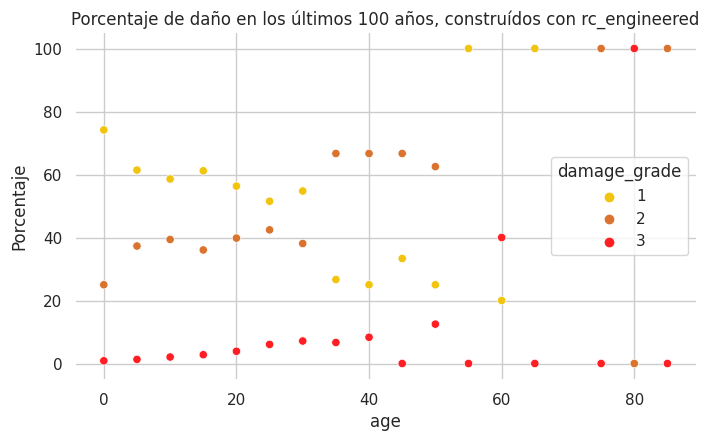

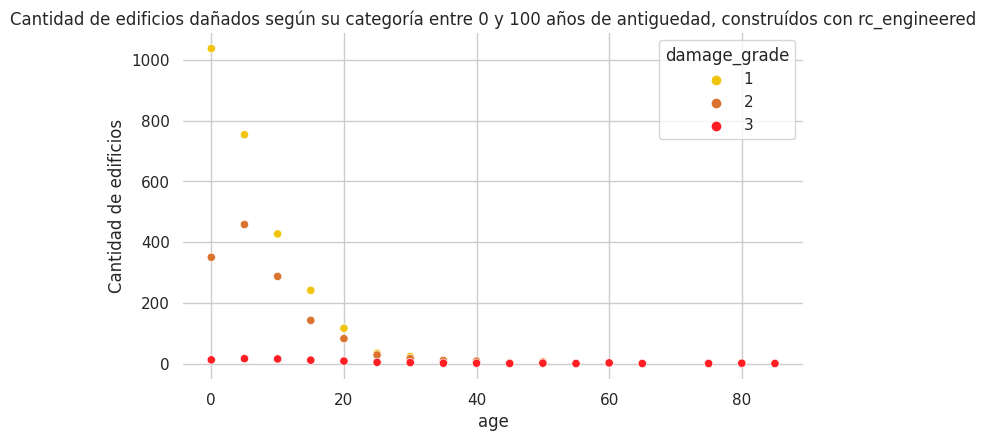

In [113]:
df_rc_engineered_with_damage_by_age = df_rc_engineered_with_damage\
    .merge(df_train_values)[['damage_grade', 'building_id', 'age']]\
    .groupby(['age', 'damage_grade'])\
    .count()\
    .reset_index()\
    .rename(columns={ 'building_id': 'total_buildings_by_age_and_rc_engineered' })

df_rc_eng_with_damage_by_age = df_rc_engineered_with_damage\
    .merge(df_train_values)[['damage_grade', 'building_id', 'age']]\
    .groupby(['age', 'damage_grade'])\
    .count()\
    .reset_index()\
    .rename(columns={ 'building_id': 'total_buildings_by_age_and_rc_engineered' })
df_rc_eng_with_damage_by_age = df_rc_eng_with_damage_by_age.loc[df_rc_eng_with_damage_by_age['age'] <= 100, :]

dt_total_by_age = df_rc_engineered_with_damage\
    .groupby(['age'])\
    .agg({ 'building_id': 'count' })\
    .reset_index()\
    .rename(columns={ 'building_id': 'total_by_age' })

df_total_by_age_percentage_damage = dt_total_by_age\
    .merge(df_rc_eng_with_damage_by_age)

df_total_by_age_percentage_damage['percentage'] = (df_total_by_age_percentage_damage['total_buildings_by_age_and_rc_engineered'] * 100) / df_total_by_age_percentage_damage['total_by_age']
df = df_total_by_age_percentage_damage.loc[df_total_by_age_percentage_damage['age'] <= 100, :]
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(8, 4.5))
sns.despine(f, left=True, bottom=True)
damage = [1, 2, 3]
plot = sns.scatterplot(
    x="age",
    y="percentage",
    hue="damage_grade",
    palette={ 1: '#f1c40f', 2: '#da732e', 3: '#ff1e23' },
    data=df,
    ax=ax
)
plt.title('Porcentaje de daño en los últimos 100 años, construídos con rc_engineered')
plt.xlabel('age')
plt.ylabel('Porcentaje')

sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(8, 4.5))
sns.despine(f, left=True, bottom=True)
damage = [1, 2, 3]
plot2 = sns.scatterplot(
    x="age",
    y="total_buildings_by_age_and_rc_engineered",
    hue="damage_grade",
    palette={ 1: '#f1c40f', 2: '#da732e', 3: '#ff1e23' },
    data=df,
    ax=ax
)
plt.title('Cantidad de edificios dañados según su categoría entre 0 y 100 años de antiguedad, construídos con rc_engineered')
# Set x-axis label
plt.xlabel('age')
# Set y-axis label
plt.ylabel('Cantidad de edificios')

Podemos ver claramente como es una superestructura que ganó popularidad con el paso del tiempo hasta el día de hoy. Esto genero que se pudiera reducir notablemente la cantidad de edificios dañados con niveles altos. Inclusive, es de los pocos indicadores que tiene mas edificios dañados con nivel 1 que con la suma de los edificios dañados entre los niveles 2 y 3.

Text(0, 0.5, 'Porcentaje')

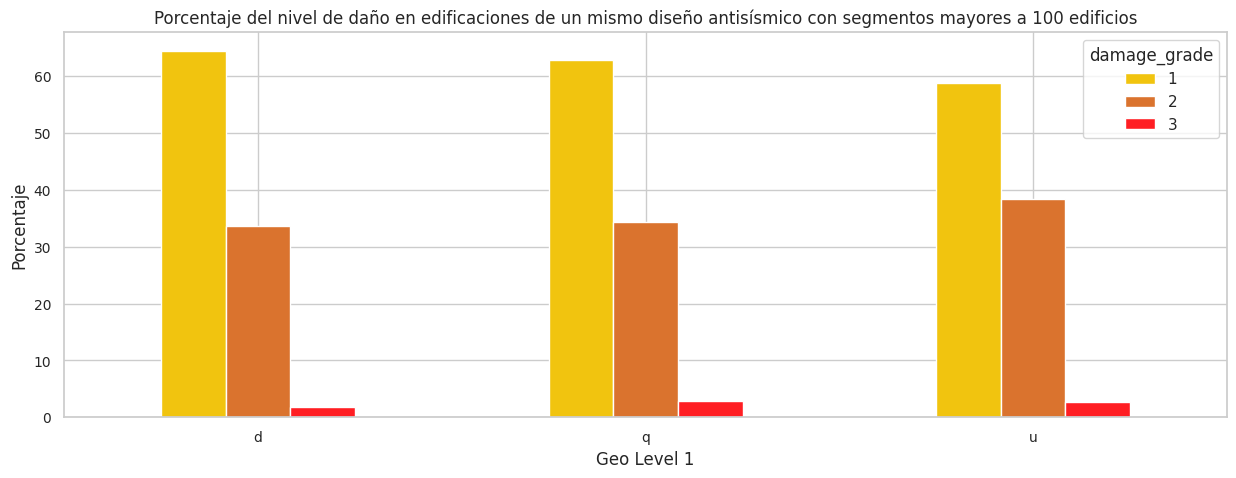

In [141]:
df_grouped_by_rc_and_damage = df_rc_engineered_with_damage\
    .merge(df_train_values)[['damage_grade', 'building_id', 'plan_configuration']]\
    .groupby(['plan_configuration', 'damage_grade'])\
    .count()\
    .reset_index()\
    .rename(columns={ 'building_id': 'total_buildings_by_plan_and_rc_engineered' })

df_total_buildings_by_rc_engineered = df_rc_engineered_with_damage\
    .groupby('plan_configuration')\
    .count()\
    .reset_index()\
    .rename(columns = { 'building_id': 'total_buildings_by_plan_configuration' })[['plan_configuration', 'total_buildings_by_plan_configuration']]


df_percentage_by_rc_engineered_and_damage = df_grouped_by_rc_and_damage.merge(df_total_buildings_by_rc_engineered.loc[df_total_buildings_by_rc_engineered['total_buildings_by_plan_configuration'] > 100, :])
df_percentage_by_rc_engineered_and_damage['percentage'] = (df_percentage_by_rc_engineered_and_damage['total_buildings_by_plan_and_rc_engineered'] * 100) / df_percentage_by_rc_engineered_and_damage['total_buildings_by_plan_configuration']

df_pivot_by_geo_ang_damage = df_percentage_by_rc_engineered_and_damage.pivot(index='plan_configuration', columns='damage_grade',values='percentage')
ax = df_pivot_by_geo_ang_damage.plot(
    kind='bar',
    figsize=(15,5),
    rot=0,
    title='Porcentaje del nivel de daño en edificaciones de un mismo diseño antisísmico con segmentos mayores a 100 edificios',
    fontsize=10,
    color={ 1: '#f1c40f', 2: '#da732e', 3: '#ff1e23' }
)

ax.set_xlabel('')
ax.set_ylabel('Porcentaje')

Podemos ver que pese a que el diseño antisísmico de categoría _d_ tenía un porcentaje muy bajo de edificios dañados con nivel 1, cuando esos edificios con diseño antisísmico de categoría d son construídos con la superestructura en cuestión, es claro que el porcentaje de edificios destruídos con daño nivel 3 es mucho menor que los edificios destruídos con daño 1.

Esto quiere decir que pese a la alta de probabilidad de salir dañado con diseño antisísmico de categoría d, el tener este material en la construcción disminuye la probabilidad de sufrir el mismo daño de manera notable.

Pero ahora surge la pregunta de que pasa con todas las estructuras que analizamos al principio. Porque a priori podemos suponer que el incremento de superstructures en un mismo edificio puede disminuir la probabilidad de sufrir de daño. 

Cuales serían los resultados en base a los datos?

In [25]:
df_rc_eng_by_sum_structures_and_damage = df_rc_engineered_with_damage\
    .merge(df_train_values)

df_rc_eng_by_sum_structures_and_damage['suma_structures'] = 0 
df_rc_eng_by_sum_structures_and_damage['suma_structures'] = \
    df_rc_eng_by_sum_structures_and_damage['has_superstructure_adobe_mud'] \
    + df_rc_eng_by_sum_structures_and_damage['has_superstructure_mud_mortar_stone'] \
    + df_rc_eng_by_sum_structures_and_damage['has_superstructure_stone_flag'] \
    + df_rc_eng_by_sum_structures_and_damage['has_superstructure_cement_mortar_stone'] \
    + df_rc_eng_by_sum_structures_and_damage['has_superstructure_mud_mortar_brick'] \
    + df_rc_eng_by_sum_structures_and_damage['has_superstructure_cement_mortar_brick'] \
    + df_rc_eng_by_sum_structures_and_damage['has_superstructure_timber'] \
    + df_rc_eng_by_sum_structures_and_damage['has_superstructure_bamboo'] \
    + df_rc_eng_by_sum_structures_and_damage['has_superstructure_rc_non_engineered'] \
    + df_rc_eng_by_sum_structures_and_damage['has_superstructure_rc_engineered'] \
    + df_rc_eng_by_sum_structures_and_damage['has_superstructure_other']

tota_buildings_by_sum_structure = df_rc_eng_by_sum_structures_and_damage\
    .groupby('suma_structures')\
    .count()\
    .reset_index()\
    .rename(columns = { 'building_id': 'total_building_by_structures' })\
    [['suma_structures', 'total_building_by_structures']]

df_rc_eng_percentages_by_damage = df_rc_eng_by_sum_structures_and_damage[['damage_grade', 'building_id', 'suma_structures']]\
    .groupby(['suma_structures', 'damage_grade'])\
    .count()\
    .reset_index()\
    .rename(columns={ 'building_id': 'total_buildings_by_age_and_rc_engineered' })\
    .merge(tota_buildings_by_sum_structure)

df_rc_eng_percentages_by_damage['percentage'] = (df_rc_eng_percentages_by_damage['total_buildings_by_age_and_rc_engineered'] * 100) / df_rc_eng_percentages_by_damage['total_building_by_structures']
df_rc_eng_percentages_by_damage

,suma_structures,damage_grade,total_buildings_by_age_and_rc_engineered,total_building_by_structures,percentage
0,1,1,1774,2594,68.39
1,1,2,773,2594,29.80
2,1,3,47,2594,1.81
3,2,1,787,1293,60.87
4,2,2,488,1293,37.74
5,2,3,18,1293,1.39
6,3,1,80,193,41.45
7,3,2,106,193,54.92
8,3,3,7,193,3.63
9,4,1,9,26,34.62


Dados los datos podemos observar que el riesgo de sufrir daño 3 se mantiene, pero a medida que un edificio incrementa estructuras, puede darse la posibilidad que pase de daño 1 a daño 2. 

También puede deberse a otros factores o la poca cantidad de datos

### __Variable: has_superstructure_other__

In [26]:
df_other_with_damage, df_other_with_percentage = calculatePercentage('has_superstructure_other', 'total_superstructure_other')
df_other_with_percentage

,damage_grade,total_superstructure_other,percentage
0,1,656,16.80
1,2,2248,57.57
2,3,1001,25.63
